In [1]:


# Import packages

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
import tensorflow as tf
import tensorflow.keras
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Read data and display data head

shopping = pd.read_csv('shoppers_intention.csv')
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
# Describe the dataset
shopping.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [3]:
# Check for null values in data
nullcount = shopping.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


In [4]:
# Checking for number of unique values for each feature

uniques = shopping.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


c:\users\aymen\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


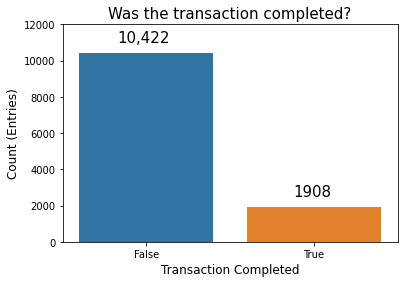

In [5]:
# Visualize the data

sns.countplot(shopping['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

c:\users\aymen\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


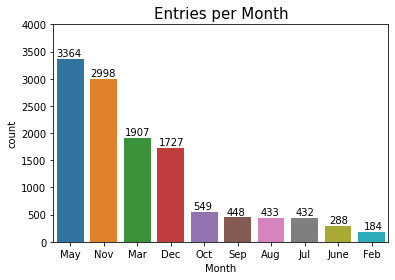

In [6]:
monthly = shopping['Month'].value_counts()

sns.countplot(shopping['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

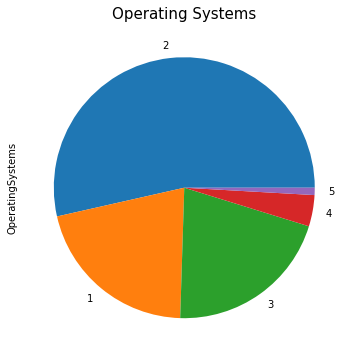

In [7]:
shopping['OperatingSystems'] = shopping['OperatingSystems'].replace([5,6,7,8],5)
os_plot = shopping['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

c:\users\aymen\pycharmprojects\pythonproject\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


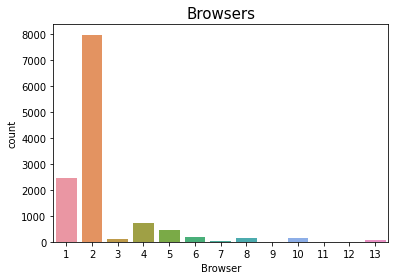

In [8]:
sns.countplot(shopping['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

In [9]:
# Removing unneccessary columns from data: shopping_clean

shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [10]:
# Encoding Vistor Type

visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)
# Split train and test data

X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

In [11]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# Make prediction using our test data and model
y_pred = gnb.predict(X_test) 

# Comparing our prediction to response values
print("Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test, y_pred)*100,2))

Gaussian Naive Bayes model accuracy(in %): 84.63


In [12]:
# Fit Random Forest Classifier to our Training Data

rfc = RandomForestClassifier()
parameters ={'max_depth':[5,10,20,50,100,200],'n_estimators':range(1,101,10)}
grid_search_rfc = GridSearchCV(rfc, param_grid=parameters,cv=5,n_jobs=-1)    
grid_search_rfc.fit(X_train,y_train)
print(grid_search_rfc.best_params_)
print(grid_search_rfc.best_score_)

rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)
# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

{'max_depth': 10, 'n_estimators': 31}
0.8998376665100561
Random Forest Classifier model accuracy(in %): 90.23


In [13]:
# Fit Extra Trees Classifier to our Training Data
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 89.5


In [14]:
## Logstic 
logit = LogisticRegression(penalty = 'l2')
parameters ={'max_iter':[1, 10, 100, 500],'C':[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000],'class_weight':['balanced', None],
          'solver':['liblinear','sag','lbfgs','newton-cg']}
grid_search_logit = GridSearchCV(logit, param_grid=parameters,cv =5,n_jobs=-1)    
grid_search_logit.fit(X_train,y_train)
print(grid_search_logit.best_params_)
print(grid_search_logit.best_score_)
        
logit = LogisticRegression(penalty = 'l2', C=20)
logit.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_logit = logit.predict(X_test)
y_prob_logit = logit.predict_proba(X_test)[:, 1]


# Comparing our prediciton to response values
print('Logstic model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_logit)*100,2))

{'C': 0.01, 'class_weight': None, 'max_iter': 10, 'solver': 'liblinear'}
0.8913221492172729
Logstic model accuracy(in %): 88.36


c:\users\aymen\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
c:\users\aymen\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [15]:
#SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC(kernel ='rbf')
parameters ={'gamma':[0.001,0.05,0.0001],'C':[1e-1, 1, 10]}
grid_search_svc = GridSearchCV(svc, param_grid=parameters,cv =5)    
grid_search_svc.fit(X_train,y_train)
print(grid_search_svc.best_params_)
print(grid_search_svc.best_score_)
        

svc = SVC(kernel = 'rbf',gamma = 0.0001,C=1,probability =True)
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
y_prob_svm = svc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('svm model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_svm)*100,2))

{'C': 1, 'gamma': 0.0001}
0.8765209126452544
svm model accuracy(in %): 88.12


The area under the ROC curve is: 0.89


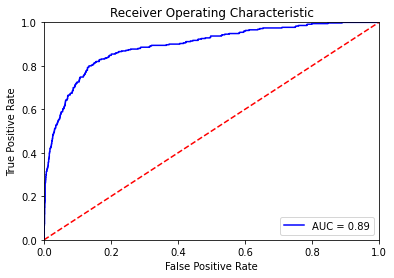

In [16]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))


Log Loss: 0.16


In [18]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [19]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb_stratified = GaussianNB() 
gnb_stratified.fit(X_train_stratified, y_train_stratified) 

# Make prediction using our test data and model
y_pred_stratified = gnb_stratified.predict(X_test_stratified) 

# Comparing our prediction to response values
print("Stratified Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test_stratified, y_pred_stratified)*100,2))

Stratified Gaussian Naive Bayes model accuracy(in %): 83.78


In [20]:
# Fit Random Forest Classifier to our Training Data
rfc_stratified = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_rfc_stratified = rfc_stratified.predict(X_test_stratified)
y_prob_rfc_stratified = rfc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediciton to response values
print('Stratified Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_rfc_stratified)*100,2))

Stratified Random Forest Classifier model accuracy(in %): 89.5


In [21]:
# Import `Sequential` from `keras.models`
from tensorflow.keras.models import Sequential

# Import `Dense` from `keras.layers`
from tensorflow.keras.layers import Dense,Dropout

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(12,)))

# Add one hidden layer 
model.add(Dense(24, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.17))
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [22]:
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam
Adam(
   learning_rate = 0.00001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False
)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train_stratified, y_train_stratified,epochs=100, batch_size=64)

Epoch 1/100
155/155 [==============================] - 1s 884us/step - loss: 7.1205 - accuracy: 0.7068
Epoch 2/100
155/155 [==============================] - 0s 808us/step - loss: 1.5057 - accuracy: 0.7921
Epoch 3/100
155/155 [==============================] - 0s 850us/step - loss: 0.6790 - accuracy: 0.8439
Epoch 4/100
155/155 [==============================] - 0s 873us/step - loss: 0.4585 - accuracy: 0.8688
Epoch 5/100
155/155 [==============================] - 0s 842us/step - loss: 0.4418 - accuracy: 0.8657
Epoch 6/100
155/155 [==============================] - 0s 819us/step - loss: 0.4159 - accuracy: 0.8719
Epoch 7/100
155/155 [==============================] - 0s 818us/step - loss: 0.3853 - accuracy: 0.8691
Epoch 8/100
155/155 [==============================] - 0s 845us/step - loss: 0.3783 - accuracy: 0.8727
Epoch 9/100
155/155 [==============================] - 0s 810us/step - loss: 0.3734 - accuracy: 0.8720
Epoch 10/100
155/155 [==============================] - 0s 839us/step - l

In [23]:
y_pred_dl = model.predict(X_train_stratified)
score = model.evaluate(X_test, y_test)
y_prob_dl_stratified = model.predict_proba(X_test_stratified)[:,:]
print(score)

78/78 [==============================] - 0s 538us/step - loss: 0.2624 - accuracy: 0.8897
[0.2624189853668213, 0.8896999359130859]


c:\users\aymen\pycharmprojects\pythonproject\venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


The area under the ROC curve for unbalanced data is: 0.89
The area under the ROC curve for stratified data is: 0.9
The area under the ROC curve for stratified deep learning data is: 0.89


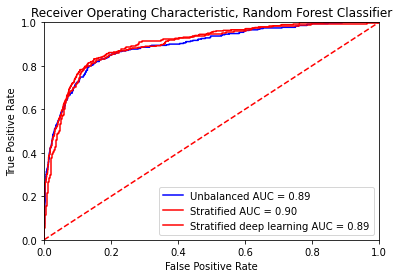

In [24]:
# Let us plot the ROC curve for the Random Forest Classifier for both the stratified data versus the unbalanced data.

roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve for unbalanced data is:', round(roc_value,2))

roc_value_stratified = roc_auc_score(y_test_stratified, y_prob_rfc_stratified)
print('The area under the ROC curve for stratified data is:', round(roc_value_stratified,2))

roc_value_stratified_dl = roc_auc_score(y_test_stratified, y_prob_dl_stratified)
print('The area under the ROC curve for stratified deep learning data is:', round(roc_value_stratified_dl,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

fpr_strat, tpr_strat, threshold_strat = metrics.roc_curve(y_test_stratified, y_prob_rfc_stratified)
roc_auc_strat = metrics.auc(fpr_strat, tpr_strat)

fpr_strat_dl, tpr_strat_dl, threshold_strat_dl = metrics.roc_curve(y_test_stratified, y_prob_dl_stratified)
roc_auc_strat_dl = metrics.auc(fpr_strat_dl, tpr_strat_dl)


# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'Unbalanced AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_strat_dl, tpr_strat_dl, 'r', label = 'Stratified deep learning AUC = %0.2f' % roc_auc_strat_dl)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:

import pickle as p

In [31]:
# save the model to disk
filename = 'model.pickle'
p.dump(model, open(filename, 'wb'))# save the knn_model to disk


TypeError: can't pickle weakref objects

In [ ]:
# reference https://www.kaggle.com/henrysue/classifying-online-shopper-intention